In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import pathlib

In [2]:
output_dir =  '../results_Jun2_suppl/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [3]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
# traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
traj_T = np.load('../results_final_Dec22/trajectories_A_extreme.npy') # it is called T but it is actually A.
with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_phate = scaler.transform(adata.obsm['X_phate'])
# traj_A_gene_all = np.load('../results_final_Dec22/traj_gene_space_A.npy')
traj_T_gene_all = np.load('../results_final_Dec22/traj_gene_space_A.npy') # it is called T but it is actually A.

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
# granger_df_all_T = pd.read_csv('../results_final_Jan15/granger_draft_T_signed_score.csv', index_col=0)
# granger_df_all_T_pvals = pd.read_csv('../results_final_Jan15/granger_draft_T_p.csv', index_col=0)
# granger_df_all_T_pvals.index = granger_df_all_T_pvals.index.str.replace('_x', '')
cluster_df = pd.read_csv('../results_Jun2_suppl/cluster_df_extreme_A_draft.csv', index_col=0)
df_reordered = pd.read_csv('../results_Jun2_suppl/granger_draft_heatmap_df_reordered.csv', index_col=0)
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

tf_reordered_cluster = pd.DataFrame(index=df_reordered.index)
tf_reordered_cluster['cluster'] = tf_reordered_cluster.index.map(cluster_df['cluster'])
gene_reordered_cluster = pd.DataFrame(index=df_reordered.columns)
gene_reordered_cluster['cluster'] = gene_reordered_cluster.index.map(cluster_df['cluster'])
df_reordered_filtered = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_reordered_cluster['cluster'].values[:, np.newaxis]
gene_clusters = gene_reordered_cluster['cluster'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered.values[mask] = 0


In [5]:
df_reordered

,ZNF234,AC010931.2,ISLR,B4GALT5,KCNG1,NFATC2,ATP9A,ZFP64,LINC01139,ZNF428,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AGRN,ADARB1
ZNF234,-0.000976,2.603060,3.479648,1.052663,-6.657087,-0.469951,6.189007,0.020861,1.277185,0.355180,...,1.069974,1.993801,-0.560187,-0.618886,1.873171,3.103757,-6.911498,1.130674,3.015409,3.396495
NFATC2,5.911294,4.713849,3.641396,1.271072,5.920888,-0.000976,4.448106,3.767018,0.001373,0.097290,...,0.170903,0.845176,0.225431,-0.169875,0.919114,0.497842,0.627918,0.222217,0.916775,6.931472
ZFP64,4.917855,1.037084,2.126119,1.133858,3.805206,-1.422976,1.465342,-0.000976,-0.710464,-0.680268,...,-0.864619,-1.265646,0.694871,0.803070,-0.778417,-0.752961,0.705562,-0.987105,0.511872,0.918203
ZNF428,1.702012,-0.681084,1.819192,4.002943,2.772811,-0.628380,-0.616793,0.639978,-1.573367,-0.000976,...,-1.452402,-2.928976,0.924726,1.250291,-1.599735,-3.508638,2.448842,-1.842672,-1.107500,-1.414020
PRRX2,2.849871,-1.152925,0.576849,0.579443,1.678461,-3.411652,0.196823,-6.767545,-1.604242,-2.247032,...,-1.863777,-2.760730,0.146015,0.349010,-2.223050,-1.617221,-0.033261,-2.061233,0.042553,-0.970977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,3.989589,3.177133,2.339104,1.159502,4.283711,2.021904,5.909657,1.045251,-0.098595,-0.105997,...,1.903679,2.499158,0.865376,1.935779,3.515179,3.728470,0.149057,1.783145,3.031815,6.926303
MYSM1,0.454561,2.903758,1.325141,0.045494,-0.465479,1.321111,3.049714,0.036020,0.413764,-0.106079,...,1.746682,3.142898,-0.774216,-0.677488,2.336864,4.732277,-2.838925,2.009461,2.558086,6.646748
ZNF605,3.278185,4.970221,2.401133,1.177654,5.027332,6.844893,6.400499,2.670278,0.039891,0.137653,...,4.067062,5.307147,1.255217,2.717684,6.814369,6.832572,2.391364,4.389982,3.889679,6.931472
ZNF891,6.489680,2.158565,1.538954,0.218218,0.751187,0.470243,3.168719,-0.085852,0.000926,-0.335458,...,0.835983,1.812141,-1.155107,-1.092679,1.275846,2.715551,-6.568985,0.999237,1.942882,5.806877


In [6]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = gene_reordered_cluster.index
assert all([g in adata.var_names for g in genes_to_plot])
# for g in genes_to_plot:
#     print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
# traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

# traj_A_mean = np.mean(traj_A_gene, axis=1)
# traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

In [7]:
traj_T_mean.shape

(100, 5273)

In [8]:
traj_T_fano = traj_T_mean.var(axis=0) /(traj_T_mean.mean(axis=0) + 1e-8)
traj_T_fano_df = pd.DataFrame(traj_T_fano, index=gene_names, columns=['fano_factor'])
traj_T_fano_df['cluster'] = traj_T_fano_df.index.map(gene_reordered_cluster['cluster'])

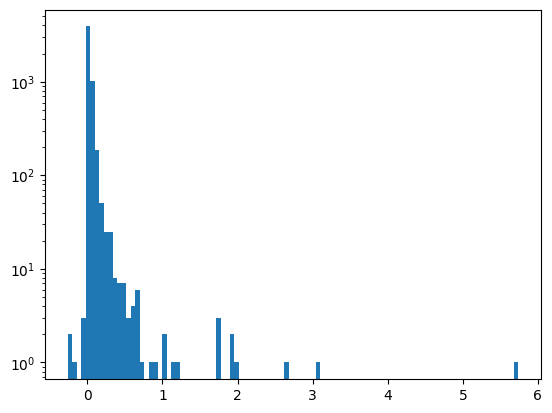

In [9]:
plt.hist(traj_T_fano, 100, log=True);

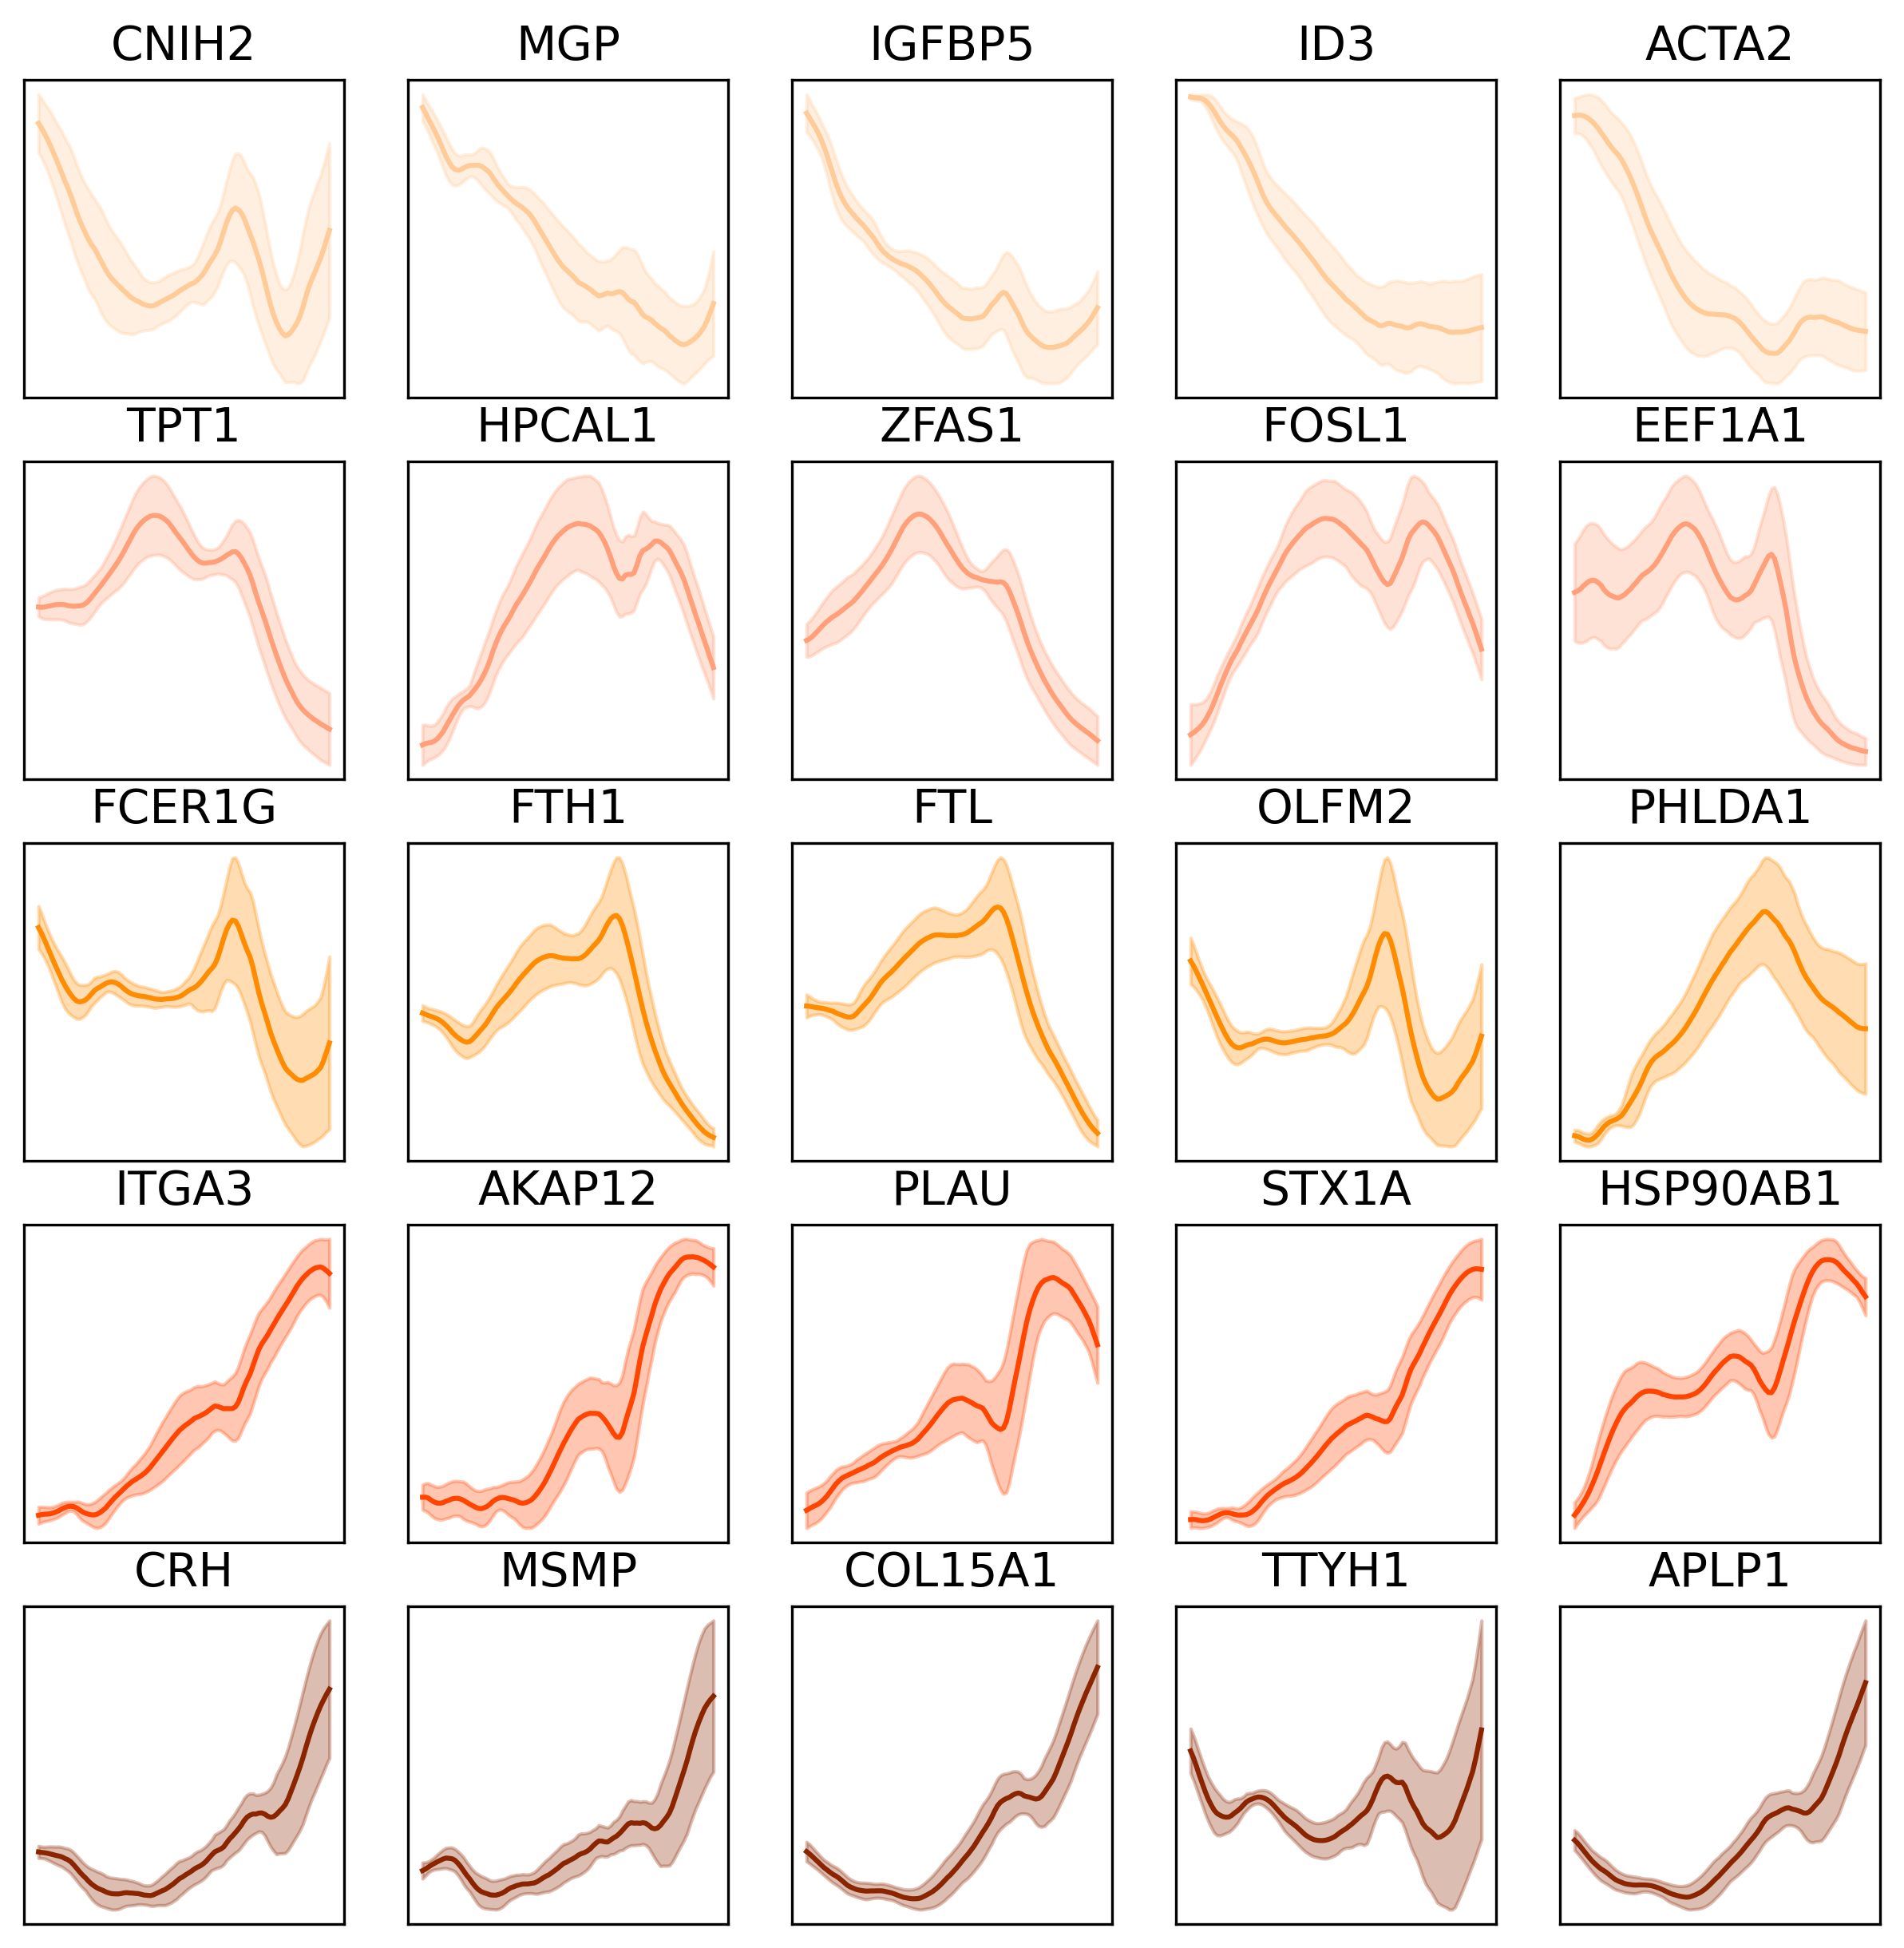

Cluster 0.0 top genes: CNIH2, MGP, IGFBP5, ID3, ACTA2
Cluster 1.0 top genes: TPT1, HPCAL1, ZFAS1, FOSL1, EEF1A1
Cluster 2.0 top genes: FCER1G, FTH1, FTL, OLFM2, PHLDA1
Cluster 3.0 top genes: ITGA3, AKAP12, PLAU, STX1A, HSP90AB1
Cluster 4.0 top genes: CRH, MSMP, COL15A1, TTYH1, APLP1


In [10]:
# Group by cluster and get the top genes by fano factor for each cluster
# First sort the dataframe by fano_factor
sorted_df = traj_T_fano_df.sort_values('fano_factor', ascending=False)
# Then group by cluster and get top 5 genes per cluster
grouped = sorted_df.groupby('cluster')
top_genes_per_cluster = {}
for cluster, group in grouped:
    # Filter out MT-, RPL-, and RPS- genes and then take top 5
    filtered_group = group[~(group.index.str.startswith('MT-') | 
                            group.index.str.startswith('RPL') | 
                            group.index.str.startswith('RPS'))]
    top_genes_per_cluster[cluster] = filtered_group.head(5).index.tolist()

# Define custom colors for each cluster
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]

# Get all unique clusters and sort them
clusters = sorted(top_genes_per_cluster.keys())
num_clusters = len(clusters)
num_genes_per_cluster = 5

# Create one figure with subplots, each row is a cluster
fig, axes = plt.subplots(num_clusters, num_genes_per_cluster, 
                         figsize=(num_genes_per_cluster * 2, num_clusters * 2), 
                         dpi=300)

# Plot trajectories for top genes in each cluster
for i, cluster in enumerate(clusters):
    genes = top_genes_per_cluster[cluster]
    cluster_color = custom_oranges[int(cluster) % len(custom_oranges)]
    
    # Add row title for the cluster
    # fig.text(0.01, 1 - (i + 0.5) / num_clusters, f"Cluster {cluster}", 
            #  va='center', ha='left', fontsize=12, fontweight='bold')
    
    for j, gene in enumerate(genes):
        gene_idx = np.where(gene_names == gene)[0][0]
        ax = axes[i, j]
        ax.plot(traj_T_mean[:, gene_idx], color=cluster_color)
        ax.fill_between(range(traj_T_mean.shape[0]), 
                        traj_T_mean[:, gene_idx] - traj_T_std[:, gene_idx], 
                        traj_T_mean[:, gene_idx] + traj_T_std[:, gene_idx], 
                        alpha=0.3, color=cluster_color)
        ax.set_title(gene, fontsize=14)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

# plt.tight_layout(rect=[0.03, 0, 1, 1])  # Adjust layout to make room for row titles
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.savefig(f'{output_dir}/5B-top5-trend-per-cluster.pdf', dpi=300, transparent=True)
plt.show()

# Print the top genes per cluster for reference
for cluster, genes in top_genes_per_cluster.items():
    print(f"Cluster {cluster} top genes: {', '.join(genes)}")

In [14]:
sorted_df.to_csv(f'{output_dir}/top-trend-per-cluster.csv')

In [16]:
import json
pathway_path = '../data/HALLMARK_APOPTOSIS.v2025.1.Hs.json'
with open(pathway_path, 'r') as f:
    pathway_data = json.load(f)

In [22]:
gene_per_cluster_with_apoptotic_genes = sorted_df[sorted_df.index.isin(pathway_data['HALLMARK_APOPTOSIS']['geneSymbols'])]

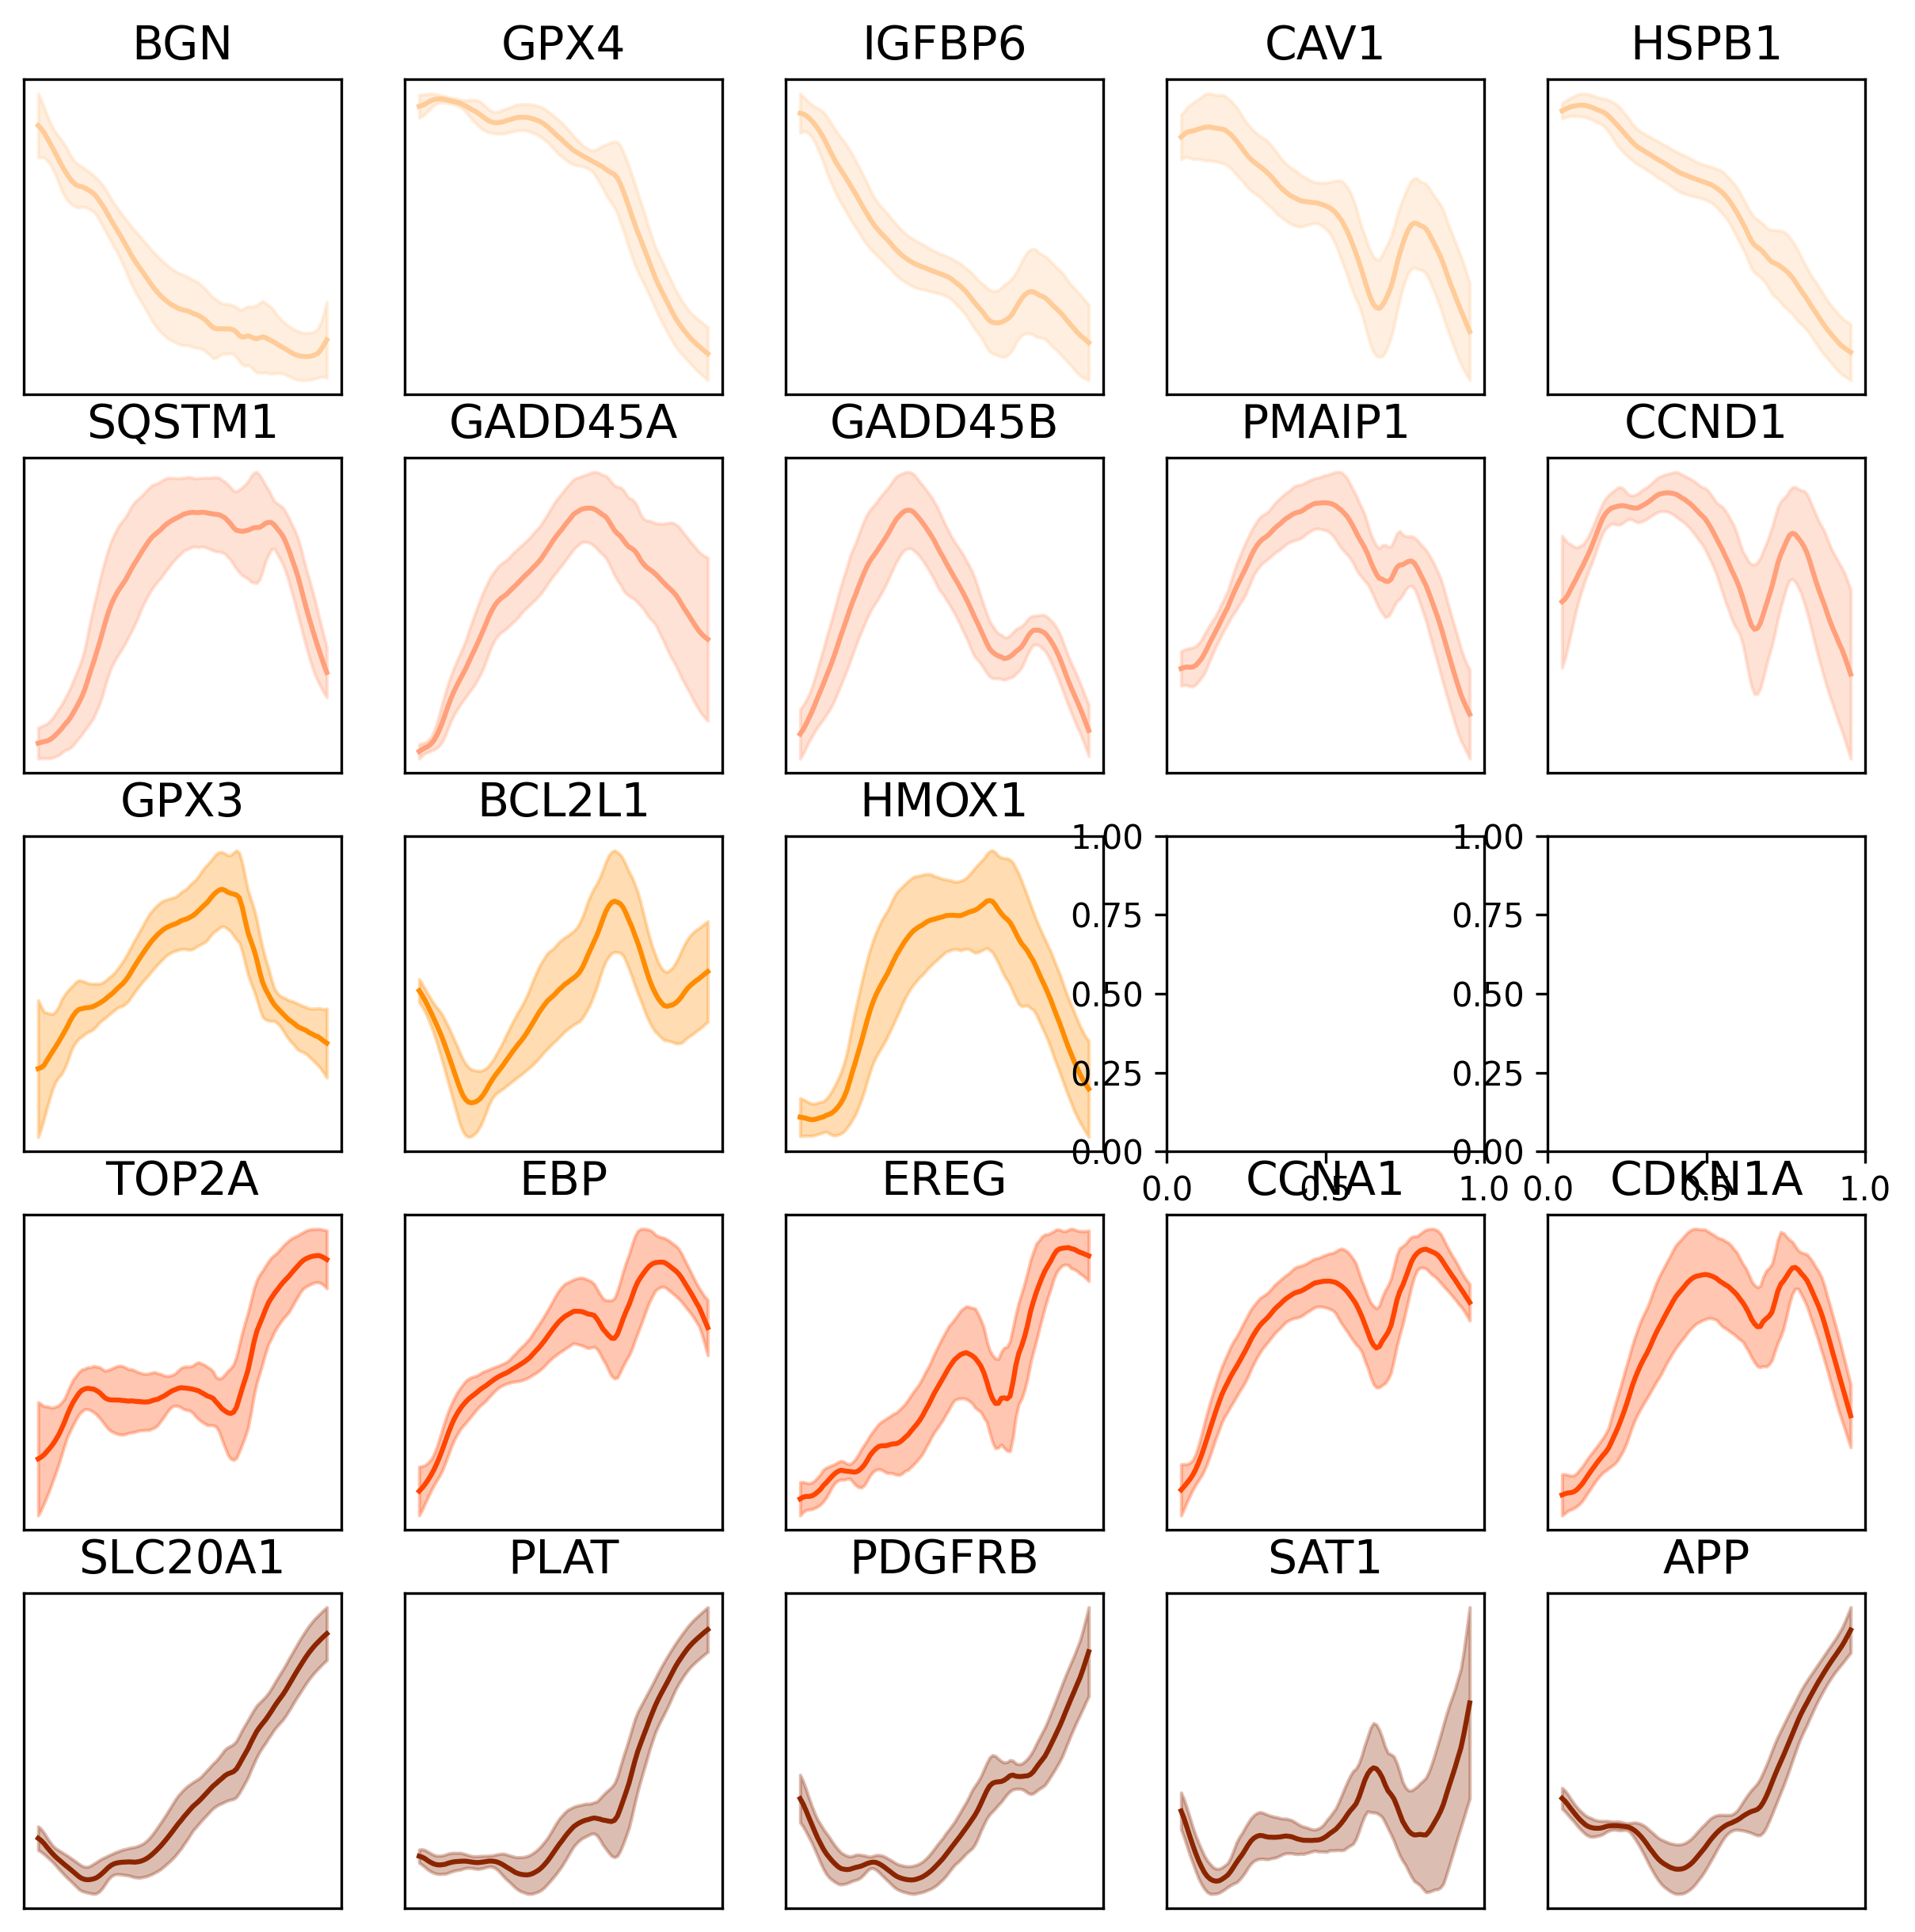

Cluster 0.0 top genes: BGN, GPX4, IGFBP6, CAV1, HSPB1
Cluster 1.0 top genes: SQSTM1, GADD45A, GADD45B, PMAIP1, CCND1
Cluster 2.0 top genes: GPX3, BCL2L1, HMOX1
Cluster 3.0 top genes: TOP2A, EBP, EREG, CCNA1, CDKN1A
Cluster 4.0 top genes: SLC20A1, PLAT, PDGFRB, SAT1, APP


In [23]:
# Group by cluster and get the top genes by fano factor for each cluster
# First sort the dataframe by fano_factor
# Then group by cluster and get top 5 genes per cluster
grouped = gene_per_cluster_with_apoptotic_genes.groupby('cluster')
top_genes_per_cluster = {}
for cluster, group in grouped:
    # Filter out MT-, RPL-, and RPS- genes and then take top 5
    filtered_group = group[~(group.index.str.startswith('MT-') | 
                            group.index.str.startswith('RPL') | 
                            group.index.str.startswith('RPS'))]
    top_genes_per_cluster[cluster] = filtered_group.head(5).index.tolist()

# Define custom colors for each cluster
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]

# Get all unique clusters and sort them
clusters = sorted(top_genes_per_cluster.keys())
num_clusters = len(clusters)
num_genes_per_cluster = 5

# Create one figure with subplots, each row is a cluster
fig, axes = plt.subplots(num_clusters, num_genes_per_cluster, 
                         figsize=(num_genes_per_cluster * 2, num_clusters * 2), 
                         dpi=300)

# Plot trajectories for top genes in each cluster
for i, cluster in enumerate(clusters):
    genes = top_genes_per_cluster[cluster]
    cluster_color = custom_oranges[int(cluster) % len(custom_oranges)]
    
    # Add row title for the cluster
    # fig.text(0.01, 1 - (i + 0.5) / num_clusters, f"Cluster {cluster}", 
            #  va='center', ha='left', fontsize=12, fontweight='bold')
    
    for j, gene in enumerate(genes):
        gene_idx = np.where(gene_names == gene)[0][0]
        ax = axes[i, j]
        ax.plot(traj_T_mean[:, gene_idx], color=cluster_color)
        ax.fill_between(range(traj_T_mean.shape[0]), 
                        traj_T_mean[:, gene_idx] - traj_T_std[:, gene_idx], 
                        traj_T_mean[:, gene_idx] + traj_T_std[:, gene_idx], 
                        alpha=0.3, color=cluster_color)
        ax.set_title(gene, fontsize=14)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

# plt.tight_layout(rect=[0.03, 0, 1, 1])  # Adjust layout to make room for row titles
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.savefig(f'{output_dir}/filtered_5B-top5-trend-per-cluster.pdf', dpi=300, transparent=True)
plt.show()

# Print the top genes per cluster for reference
for cluster, genes in top_genes_per_cluster.items():
    print(f"Cluster {cluster} top genes: {', '.join(genes)}")

In [24]:
# Add a column indicating whether gene is in apoptotic pathway
sorted_df_copy = sorted_df.copy()
sorted_df_copy['is_apoptotic'] = sorted_df_copy.index.isin(pathway_data['HALLMARK_APOPTOSIS']['geneSymbols'])

# Re-sort by fano_factor (descending) but prioritize apoptotic genes
gene_per_cluster_with_apoptotic_genes = sorted_df_copy.sort_values(['is_apoptotic', 'fano_factor'], ascending=[False, False])

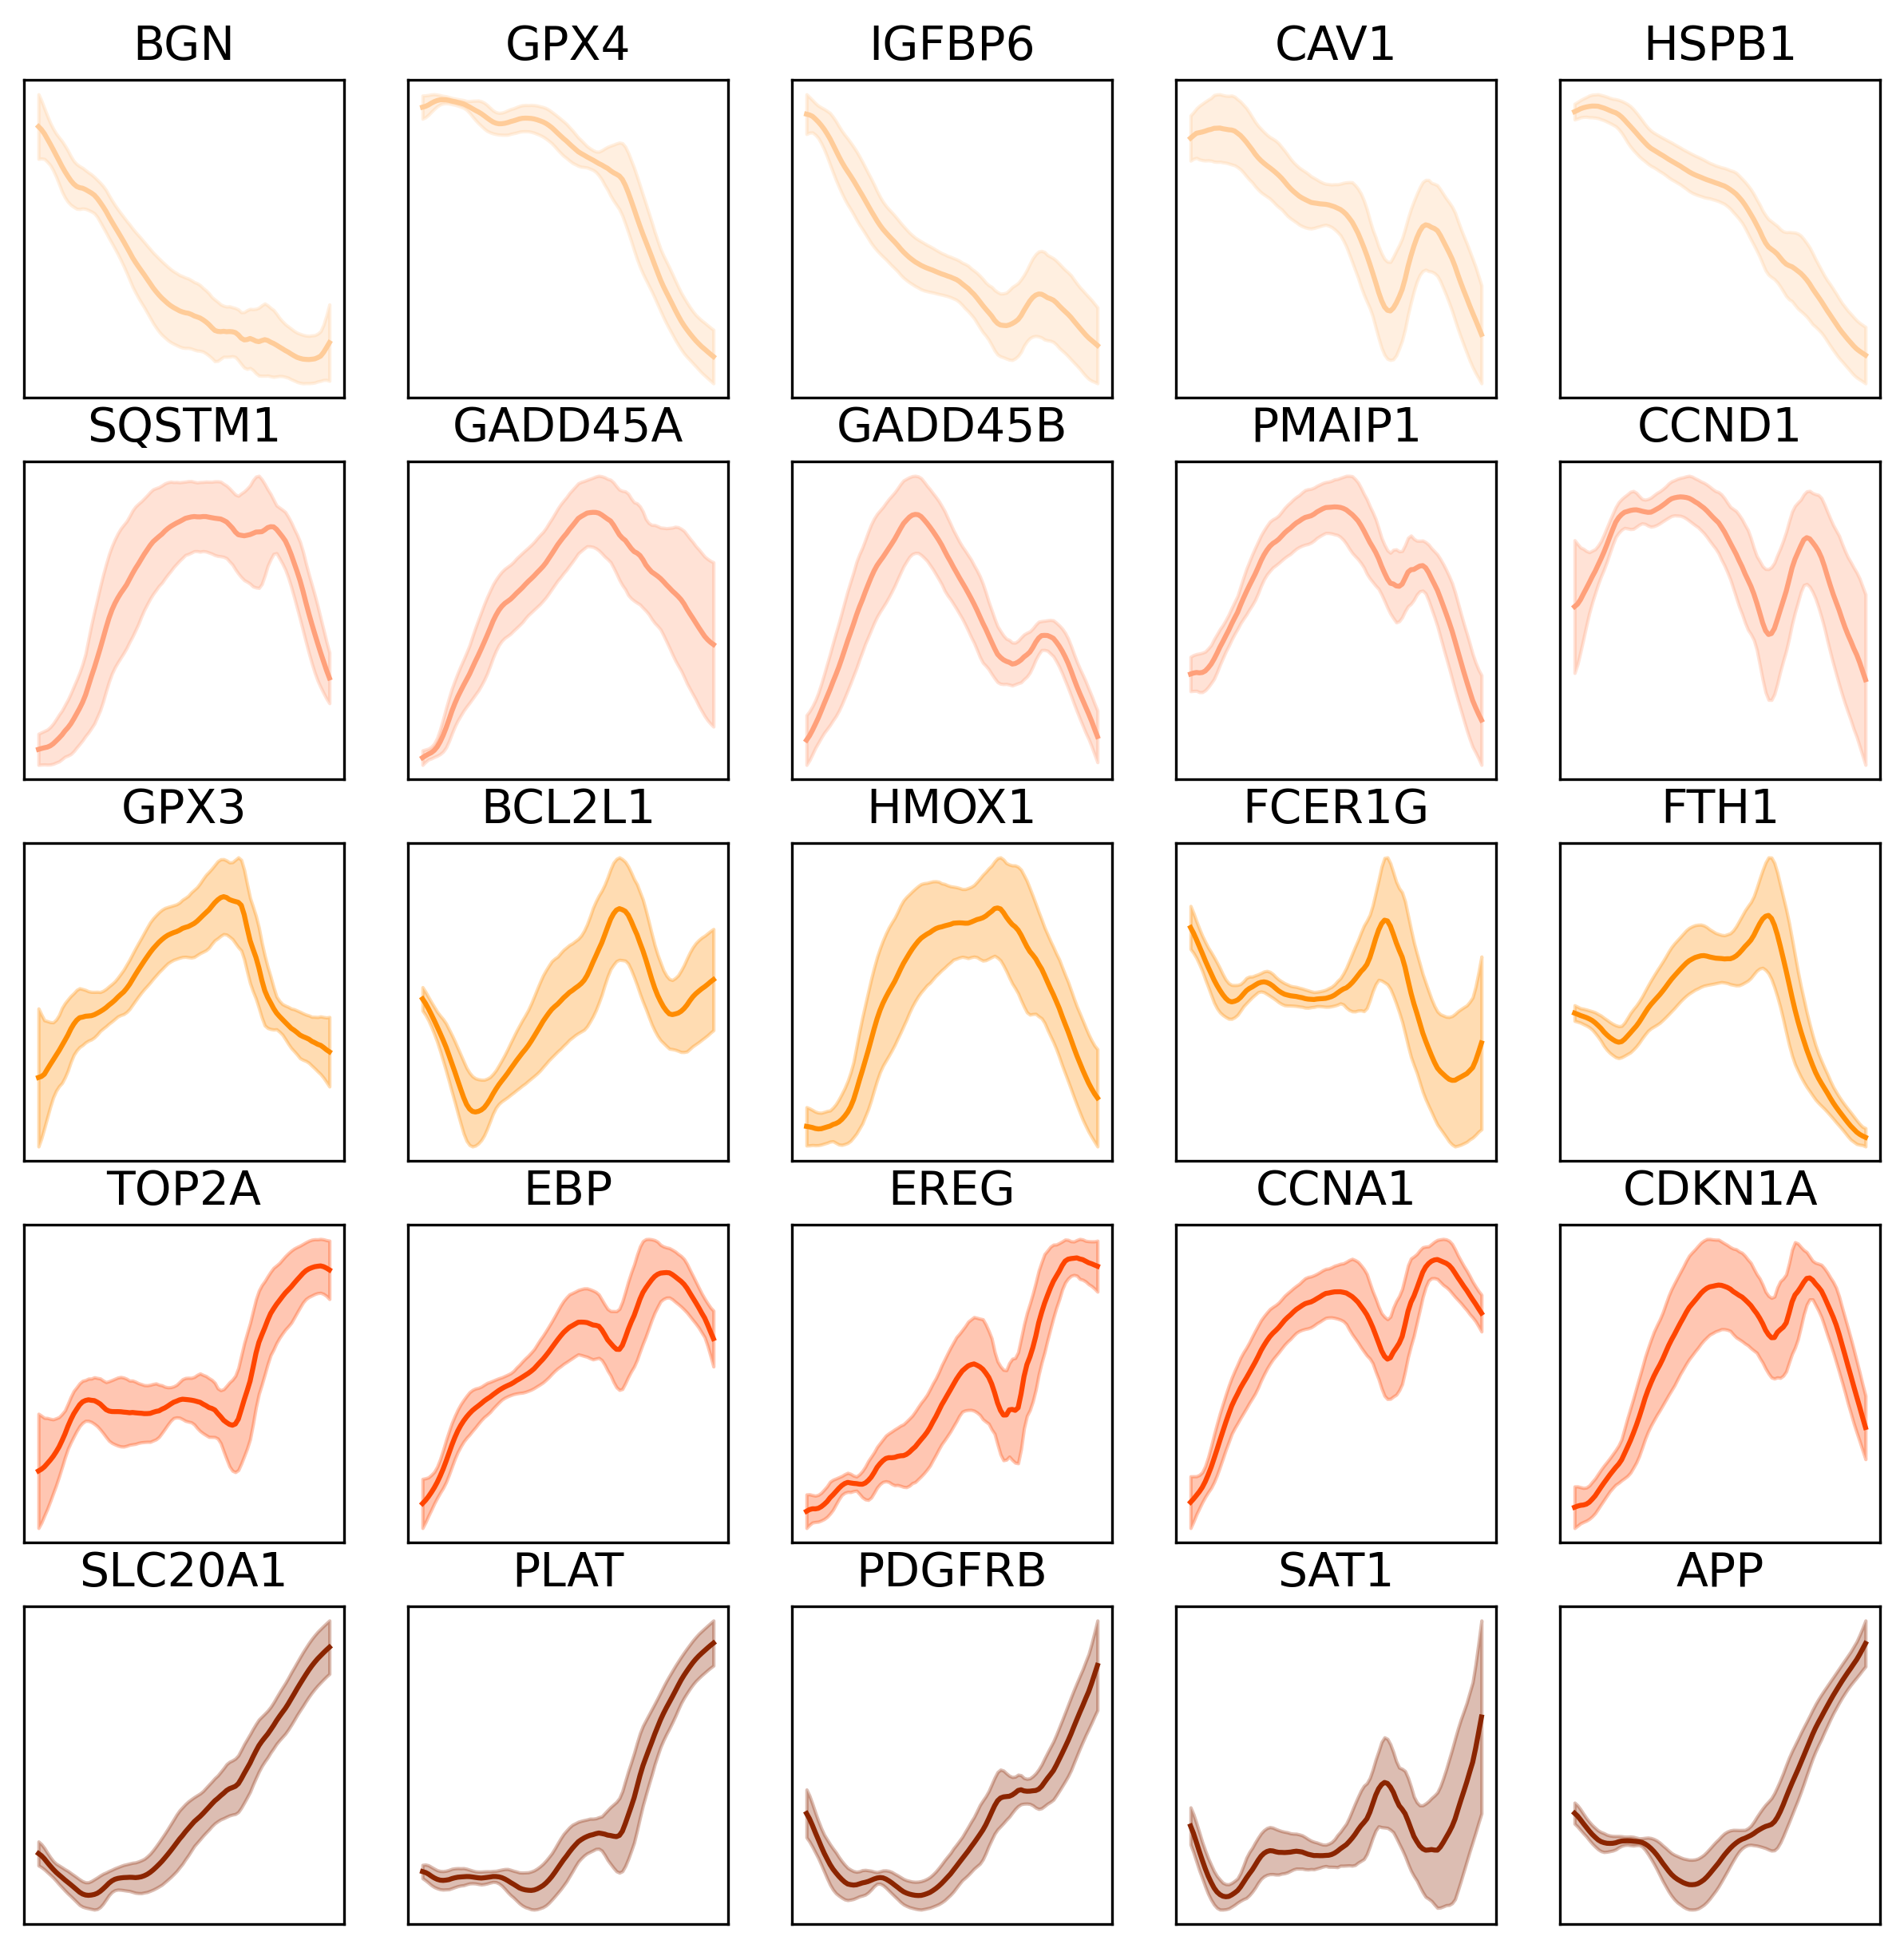

Cluster 0.0 top genes: BGN, GPX4, IGFBP6, CAV1, HSPB1
Cluster 1.0 top genes: SQSTM1, GADD45A, GADD45B, PMAIP1, CCND1
Cluster 2.0 top genes: GPX3, BCL2L1, HMOX1, FCER1G, FTH1
Cluster 3.0 top genes: TOP2A, EBP, EREG, CCNA1, CDKN1A
Cluster 4.0 top genes: SLC20A1, PLAT, PDGFRB, SAT1, APP


In [25]:
# Group by cluster and get the top genes by fano factor for each cluster
# First sort the dataframe by fano_factor
# Then group by cluster and get top 5 genes per cluster
grouped = gene_per_cluster_with_apoptotic_genes.groupby('cluster')
top_genes_per_cluster = {}
for cluster, group in grouped:
    # Filter out MT-, RPL-, and RPS- genes and then take top 5
    filtered_group = group[~(group.index.str.startswith('MT-') | 
                            group.index.str.startswith('RPL') | 
                            group.index.str.startswith('RPS'))]
    top_genes_per_cluster[cluster] = filtered_group.head(5).index.tolist()

# Define custom colors for each cluster
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]

# Get all unique clusters and sort them
clusters = sorted(top_genes_per_cluster.keys())
num_clusters = len(clusters)
num_genes_per_cluster = 5

# Create one figure with subplots, each row is a cluster
fig, axes = plt.subplots(num_clusters, num_genes_per_cluster, 
                         figsize=(num_genes_per_cluster * 2, num_clusters * 2), 
                         dpi=300)

# Plot trajectories for top genes in each cluster
for i, cluster in enumerate(clusters):
    genes = top_genes_per_cluster[cluster]
    cluster_color = custom_oranges[int(cluster) % len(custom_oranges)]
    
    # Add row title for the cluster
    # fig.text(0.01, 1 - (i + 0.5) / num_clusters, f"Cluster {cluster}", 
            #  va='center', ha='left', fontsize=12, fontweight='bold')
    
    for j, gene in enumerate(genes):
        gene_idx = np.where(gene_names == gene)[0][0]
        ax = axes[i, j]
        ax.plot(traj_T_mean[:, gene_idx], color=cluster_color)
        ax.fill_between(range(traj_T_mean.shape[0]), 
                        traj_T_mean[:, gene_idx] - traj_T_std[:, gene_idx], 
                        traj_T_mean[:, gene_idx] + traj_T_std[:, gene_idx], 
                        alpha=0.3, color=cluster_color)
        ax.set_title(gene, fontsize=14)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

# plt.tight_layout(rect=[0.03, 0, 1, 1])  # Adjust layout to make room for row titles
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.savefig(f'{output_dir}/filtered_5B-top5-trend-per-cluster.pdf', dpi=300, transparent=True)
plt.show()

# Print the top genes per cluster for reference
for cluster, genes in top_genes_per_cluster.items():
    print(f"Cluster {cluster} top genes: {', '.join(genes)}")